# DIAMOND PRICE ANALYSIS

In [172]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# Load the dataset and print first 5 rows
df = pd.read_excel("data.xlsx")
df.head()

,IDNO,WEIGHT,COLOR,CLARITY,RATER,PRICE
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [174]:
df.isna().sum()

IDNO       0
WEIGHT     0
COLOR      0
CLARITY    0
RATER      0
PRICE      0
dtype: int64

In [175]:
df.dtypes

IDNO         int64
WEIGHT     float64
COLOR       object
CLARITY     object
RATER       object
PRICE        int64
dtype: object

###  1. Regression and Correlation Analysis

In [176]:
# 1. Compute Pearson Correlation and Linear Regression
# Pearson correlation
correlation = stats.pearsonr(df['WEIGHT'], df['PRICE'])
print("Pearson Correlation:", correlation)



Pearson Correlation: PearsonRResult(statistic=np.float64(0.9447266196457202), pvalue=np.float64(3.044809626588812e-150))


### Correlation Output:
Correlation coefficient (r): 0.945
p-value: 3.04 × 10⁻¹⁵⁰

### Interpretation:
Correlation coefficient of 0.945 shows there exist a very strong positive linear relationship between diamond weight and price.

The p-value is extremely small (< 0.001), meaning this correlation is statistically significant. Implying that as diamond weight increases, price also increases significantly and consistently.


In [177]:
# Linear Regression
X = sm.add_constant(df['WEIGHT']) 
model = sm.OLS(df['PRICE'], X).fit()

# Summary for regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          3.04e-150
Time:                        14:00:35   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

 ### Interpretation
Regression Equation:

Price= −2298.36+11598.88×Weight

R-squared = 0.893
Close to 89.3% of the variation in diamond price is explained by its weight  

p-value for WEIGHT < .001
The weight of a diamond is highly statistically significant in predicting price.

F-statistic = 2541, p < .001
The model as a whole is statistically significant.

 

In [178]:
# a. Slope 
slope = model.params['WEIGHT']
print(f"Slope: {slope}")

Slope: 11598.884012882314


a. Slope associated with weight:
11,598.88

This means for every 1 carat increase in weight, the price increases by approximately $11,599.

In [179]:
# b. Constant
constant = model.params['const']
print(f"Constant: {constant}")

Constant: -2298.357601893803


b. Constant for the regression equation 
 -2,298.36

This is the expected price when the weight is 0 theoretical,but not practical.

In [180]:
# c. Mean weight and price
mean_carat = df['WEIGHT'].mean()
mean_price = df['PRICE'].mean()
print(f"Mean Weight: {mean_carat}")
print(f"Mean Price: {mean_price}")

Mean Weight: 0.6309090909090909
Mean Price: 5019.483766233766


c. Mean values:

Mean weight = 0.63 carats

Mean price = $5,019.48

In [181]:
# d. Correlation and significance
correlation_value = correlation[0]
p_value_correlation = correlation[1]
print(f"Correlation: {correlation_value}")
print(f"Correlation p-value: {p_value_correlation}")

Correlation: 0.9447266196457202
Correlation p-value: 3.044809626588812e-150


### Correlation Output:
Correlation coefficient (r): 0.945
p-value: 3.04 × 10⁻¹⁵⁰

### Interpretation:
Correlation coefficient of 0.945 shows there exist a very strong positive linear relationship between diamond weight and price.

The p-value is extremely small (< 0.001), meaning this correlation is statistically significant. Implying that as diamond weight increases, price also increases significantly and consistently.

In [182]:
# e. Regression Equation
print(f"Regression Equation: Price = {constant} + {slope} * Weight")

Regression Equation: Price = -2298.357601893803 + 11598.884012882314 * Weight


### Regression Equation:

Price= −2298.36+11598.88×Weight

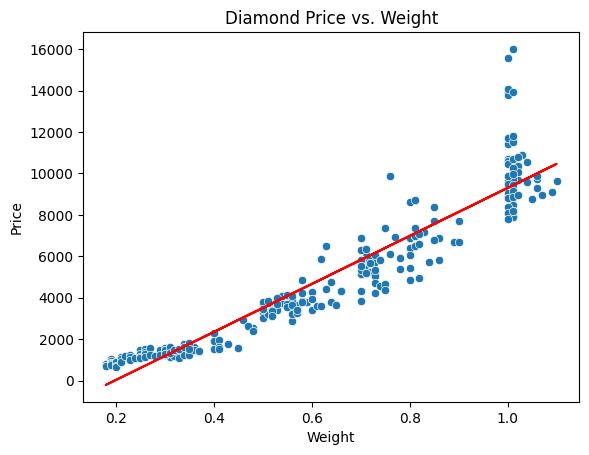

In [183]:
# 2. Scatterplot with Regression Line
sns.scatterplot(x='WEIGHT', y='PRICE', data=df)
plt.plot(df['WEIGHT'], model.predict(X), color='red')
plt.title('Diamond Price vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

Strong Positive Linear Relationship exists:
The points form a tight, upward-sloping cluster around the regression line suggesting that as weight increases, price also increases—almost proportionally.

High Predictability:
Given that most data points lie close to the line of best fit, there is low dispersion, meaning weight is a strong predictor of price.  

In [184]:
# 3. Significance of Relationship
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          3.04e-150
Time:                        14:00:36   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

### 3. Is the price significantly related to the diamond’s weight? Interpret the results of the regression analysis to answer the question. 

 ### Interpretation

R-squared = 0.893
Close to 89.3% of the variation in diamond price is explained by its weight  

p-value for WEIGHT < .001
The weight of a diamond is highly statistically significant in predicting price.

F-statistic = 2541, p < .001
The model as a whole is statistically significant.

### Conclusion
Price is significantly related to a diamond's weight. The regression model is strong, and weight explains a major portion of the variation in price.